In [2]:
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
import matplotlib.pyplot as plt
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [22]:
df = pd.read_csv(r"C:\Users\Anonymous\Desktop\Machine Learning\Datasets\AirPassengers.csv",index_col=0)
df.head()


,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [24]:
idx = pd.to_datetime(df.index,format="%Y-%m").to_period("M")
df.index = idx
type(idx)
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


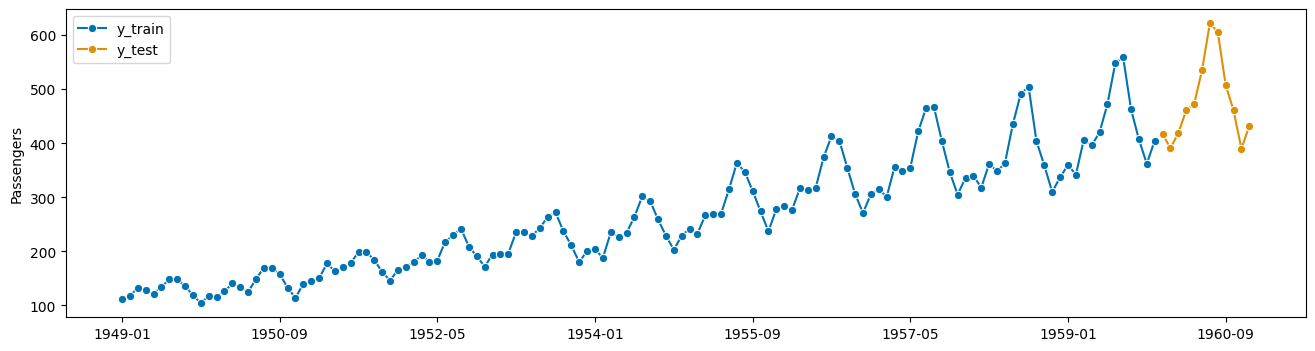

In [25]:
y = df['Passengers']
y_train, y_test = temporal_train_test_split(y, test_size=12)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
#print(y_train.shape[0], y_test.shape[0])
plt.show()


In [26]:

"""Specifying the Forecasting Horizon"""

fh = ForecastingHorizon(y_test.index,is_relative=False)
fh



ForecastingHorizon(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', is_relative=False)

16.979906128442913


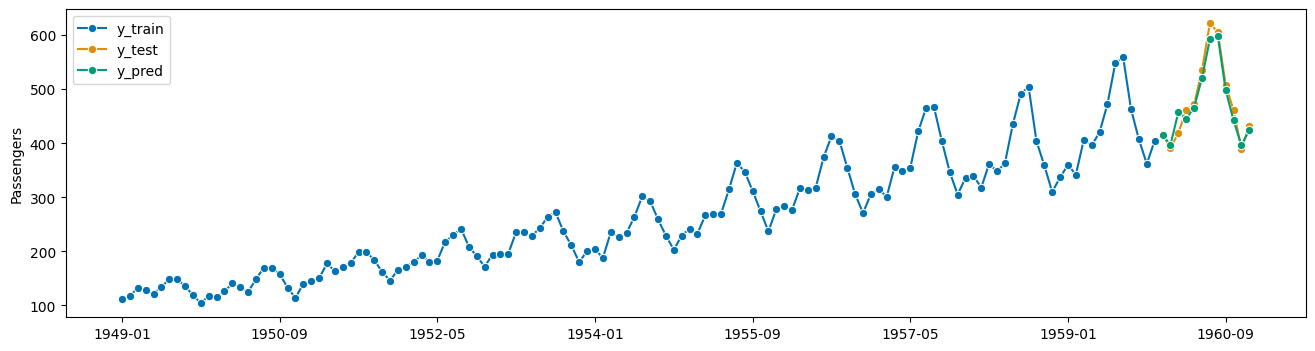

In [27]:
"""**Exponential Smoothing**"""

forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=True))



10604.778654428159


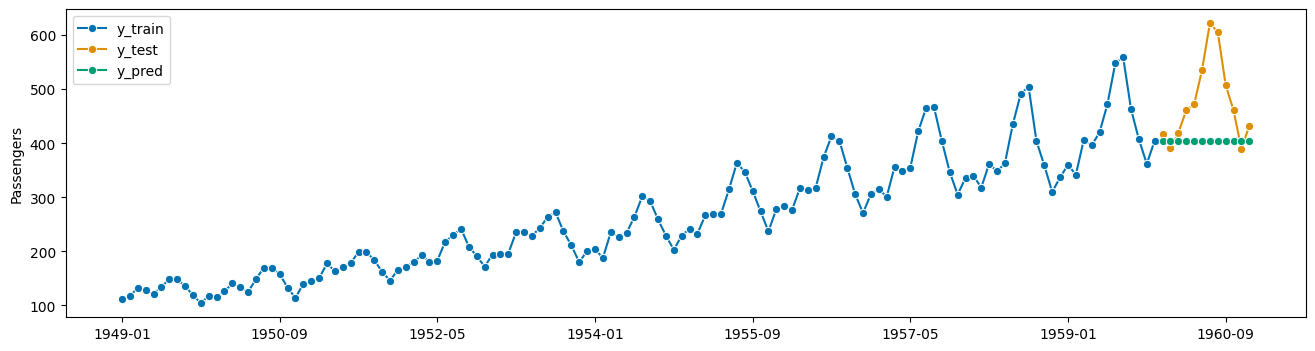

In [28]:
"""**ETS fitting**

Simple Exponential Smoothing
"""

forecaster = AutoETS(auto=False, sp=12,error='add',trend=None,seasonal=None)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))


651.447260931427
                                 ETS Results                                  
Dep. Variable:             Passengers   No. Observations:                  132
Model:                       ETS(MAM)   Log Likelihood                -469.386
Date:                Mon, 17 Jul 2023   AIC                            974.771
Time:                        15:36:48   BIC                           1026.662
Sample:                    01-31-1949   HQIC                           995.857
                         - 12-31-1959   Scale                            0.001
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999      0.083     12.009      0.000       0.837       1.163
smoothing_trend      9.999e-05        nan        nan        nan         nan         nan

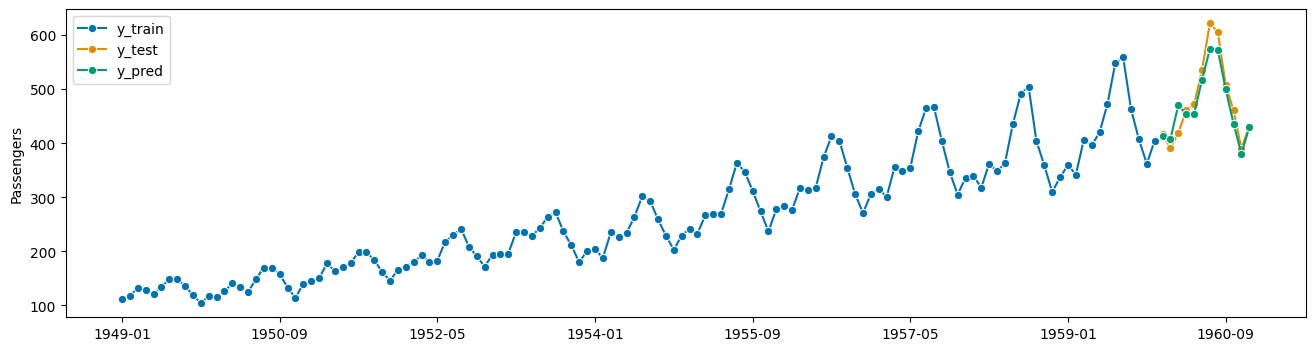

In [29]:

"""Auto-Tuned"""

forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))

print(forecaster.summary())